In [1]:
import pandas as pd

This Data can be imported only if the excel file is in the same directory, otherwise just update path. Also excel file cannot be open at the time of dropping it into this jupyter file

In [34]:
PlayerName = input("Enter name of PGA player to see their stats")

In [35]:
fullDF = pd.read_excel('PGAData2015-2022.xlsx')
PlayerDF = fullDF[fullDF['player'] == PlayerName]

In [36]:
PlayerDF.head()

,Player_initial_last,tournament id,player id,hole_par,strokes,hole_DKP,hole_FDP,hole_SDP,streak_DKP,streak_FDP,...,purse,season,no_cut,Finish,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
0,A. Hadwin,401353275,5548,284,283,57.0,51.3,62,0,1.8,...,15.0,2022,1,T44,-0.56,0.23,-0.03,-0.13,0.06,-0.50
64,A. Hadwin,401353274,5548,280,289,43.5,32.0,47,0,0.2,...,15.0,2022,0,69,-0.83,-0.72,-0.21,-1.27,-2.20,-3.04
304,A. Hadwin,401353214,5548,288,278,72.0,69.2,76,3,15.6,...,8.4,2022,0,T37,1.02,-0.10,-0.27,0.00,-0.37,0.65
439,A. Hadwin,401353215,5548,284,281,64.5,56.6,65,3,12.8,...,7.5,2022,0,T38,0.17,0.03,-0.04,0.72,0.70,0.87
866,A. Hadwin,401353220,5548,142,142,30.5,26.3,29,0,5.8,...,7.1,2022,0,CUT,-0.83,0.83,-0.62,-0.17,0.04,-0.79


In [37]:
CutCheck = PlayerDF['Finish'] == 'CUT'
CutStats = PlayerDF[CutCheck]
CutStats.head()

,Player_initial_last,tournament id,player id,hole_par,strokes,hole_DKP,hole_FDP,hole_SDP,streak_DKP,streak_FDP,...,purse,season,no_cut,Finish,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
866,A. Hadwin,401353220,5548,142,142,30.5,26.3,29,0,5.8,...,7.1,2022,0,CUT,-0.83,0.83,-0.62,-0.17,0.04,-0.79
1709,A. Hadwin,401353227,5548,144,146,23.5,20.5,27,0,0.2,...,9.1,2022,0,CUT,-1.14,0.16,-2.06,-0.32,-2.22,-3.36
3147,A. Hadwin,401353237,5548,142,146,22.5,16.5,25,0,0.0,...,12.0,2022,0,CUT,-1.59,0.60,-1.29,0.00,-0.69,-2.29
3534,A. Hadwin,401353234,5548,143,148,19.5,14.4,23,0,0.6,...,8.4,2022,0,CUT,-1.75,-0.10,1.02,-0.93,0.00,-2.83
4889,A. Hadwin,401353193,5548,144,143,33.0,28.9,30,0,5.4,...,7.0,2022,0,CUT,-0.04,0.95,-0.33,-0.86,-0.24,-0.28


In [38]:
averageStats = PlayerDF.groupby('Finish').mean()
averageStats.head()

C:\Users\fieng\AppData\Local\Temp\ipykernel_8836\755095371.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  averageStats = PlayerDF.groupby('Finish').mean()


,tournament id,player id,hole_par,strokes,hole_DKP,hole_FDP,hole_SDP,streak_DKP,streak_FDP,streak_SDP,...,Unnamed: 4,purse,season,no_cut,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
Finish,,,,,,,,,,,,,,,,,,,,,
1,2719.0,5548.0,284.0,270.0,82.0,79.60,80.0,6.0,17.6,7.0,...,NaN,6.30,2017.0,0.0,1.720,0.280,2.040,-0.04,2.290,4.00
2,401148235.0,5548.0,288.0,272.0,85.0,84.20,82.0,6.0,23.8,7.0,...,NaN,6.60,2020.0,0.0,1.110,0.430,1.710,-0.11,2.030,3.13
4,401056558.0,5548.0,284.0,266.0,93.0,91.60,82.0,14.0,25.4,9.0,...,NaN,6.40,2019.0,0.0,1.590,-0.910,1.670,0.41,1.160,2.75
6,200529626.0,5548.0,249.0,240.5,67.5,62.75,67.0,4.5,12.6,5.0,...,NaN,8.15,2018.0,0.0,0.375,0.265,1.155,0.99,2.415,2.79
23,2718.0,5548.0,280.0,281.0,60.0,51.10,56.0,0.0,7.4,0.0,...,NaN,8.75,2017.0,1.0,1.530,-0.470,-0.860,-1.07,-2.400,-0.87


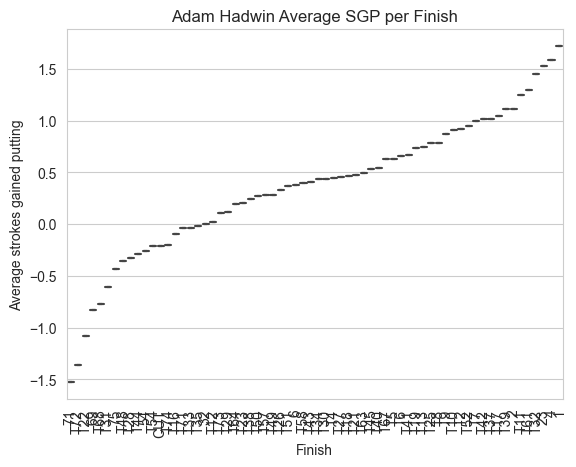

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

averageStats.index = pd.Categorical(averageStats.index)
AverageSgpSorted = averageStats.sort_values("sg_putt")
sns.set_style("whitegrid")
sns.boxplot(data=averageStats, x=averageStats.index, y="sg_putt", whis=[0,100], order=AverageSgpSorted.index)

# add labels and title
plt.xlabel("Finish")
plt.ylabel("Average strokes gained putting")
plt.title(PlayerName + " Average SGP per Finish")
# rotates x axis labels to make them visible
plt.xticks(rotation=90)
plt.show()

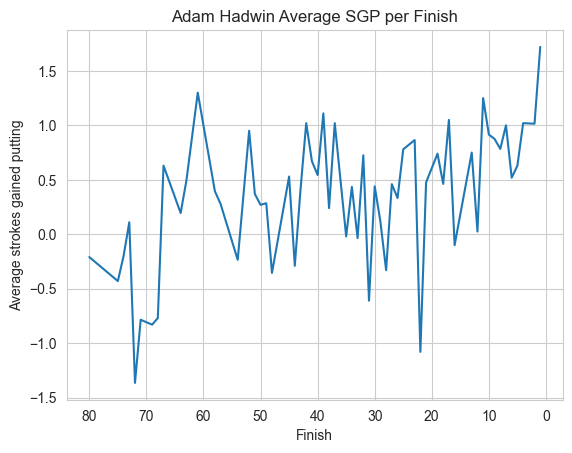

In [40]:
#testing a line plot

# create a copy of the averageStats DataFrame and remove "T" and "cut" values from the index
averageStats_copy = averageStats.copy()
averageStats_copy.index = averageStats_copy.index.astype(str)
averageStats_copy.index = averageStats_copy.index.str.replace("CUT", "80").str.replace("T", "").astype(int)
averageStats_copy = averageStats_copy.groupby(averageStats_copy.index).mean()
plt.plot(averageStats_copy.index, averageStats_copy["sg_putt"])
# add labels and title
plt.xlabel("Finish")
plt.ylabel("Average strokes gained putting")
plt.title(PlayerName + " Average SGP per Finish")

plt.gca().invert_xaxis()
plt.show()

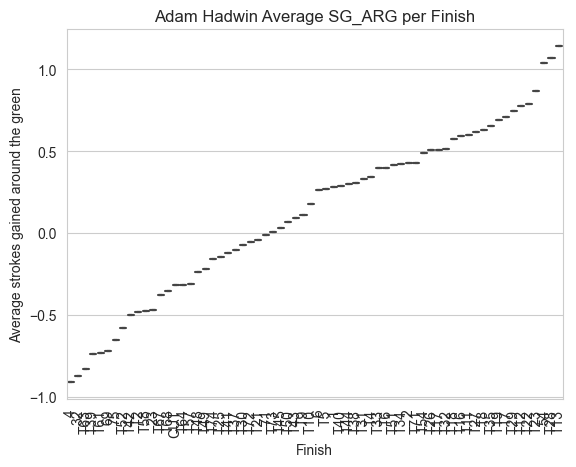

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

averageStats.index = pd.Categorical(averageStats.index)
AverageSgArgSorted = averageStats.sort_values("sg_arg")
sns.set_style("whitegrid")
sns.boxplot(data=averageStats, x=averageStats.index, y="sg_arg", whis=[0,100], order=AverageSgArgSorted.index)

# add labels and title
plt.xlabel("Finish")
plt.ylabel("Average strokes gained around the green")
plt.title(PlayerName + " Average SG_ARG per Finish")
# rotates x axis labels to make them visible
plt.xticks(rotation=90)
plt.show()

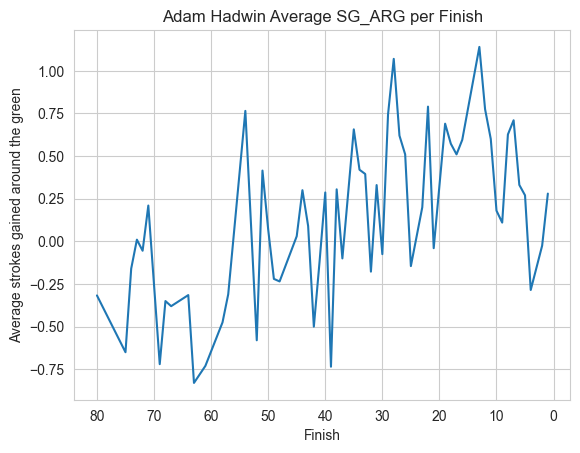

In [42]:
#testing a line plot

# create a copy of the averageStats DataFrame and remove "T" and "cut" values from the index
averageStats_copy = averageStats.copy()
averageStats_copy.index = averageStats_copy.index.astype(str)
averageStats_copy.index = averageStats_copy.index.str.replace("CUT", "80").str.replace("T", "").astype(int)
averageStats_copy = averageStats_copy.groupby(averageStats_copy.index).mean()
plt.plot(averageStats_copy.index, averageStats_copy["sg_arg"])
# add labels and title
plt.xlabel("Finish")
plt.ylabel("Average strokes gained around the green")
plt.title(PlayerName + " Average SG_ARG per Finish")

plt.gca().invert_xaxis()
plt.show()

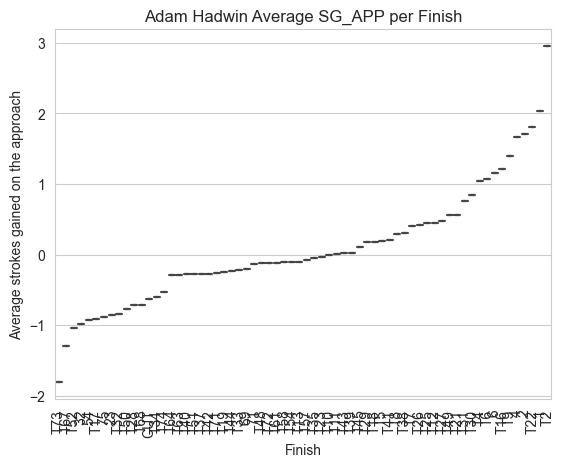

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

averageStats.index = pd.Categorical(averageStats.index)
AverageSg_appSorted = averageStats.sort_values("sg_app")
sns.set_style("whitegrid")
sns.boxplot(data=averageStats, x=averageStats.index, y="sg_app", whis=[0,100], order=AverageSg_appSorted.index)

# add labels and title
plt.xlabel("Finish")
plt.ylabel("Average strokes gained on the approach")
plt.title(PlayerName + " Average SG_APP per Finish")
# rotates x axis labels to make them visible
plt.xticks(rotation=90)
plt.show()

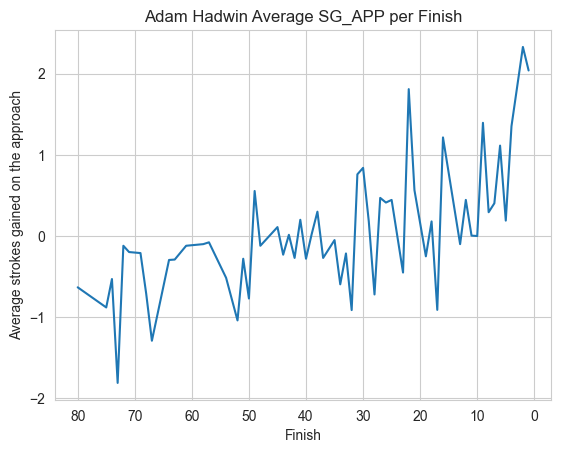

In [44]:
#testing a line plot

# create a copy of the averageStats DataFrame and remove "T" and "cut" values from the index
averageStats_copy = averageStats.copy()
averageStats_copy.index = averageStats_copy.index.astype(str)
averageStats_copy.index = averageStats_copy.index.str.replace("CUT", "80").str.replace("T", "").astype(int)
averageStats_copy = averageStats_copy.groupby(averageStats_copy.index).mean()
plt.plot(averageStats_copy.index, averageStats_copy["sg_app"])
# add labels and title
plt.xlabel("Finish")
plt.ylabel("Average strokes gained on the approach")
plt.title(PlayerName + " Average SG_APP per Finish")

plt.gca().invert_xaxis()
plt.show()

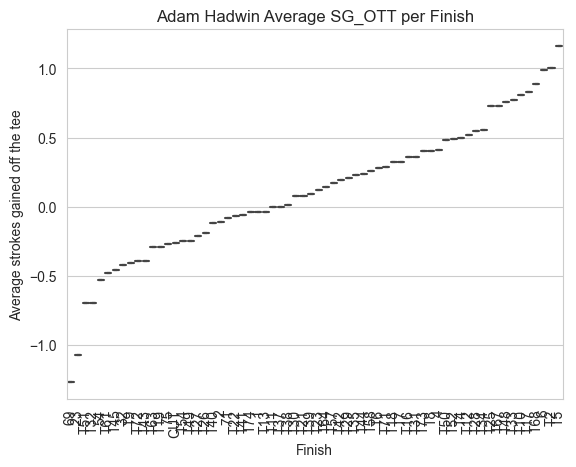

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

averageStats.index = pd.Categorical(averageStats.index)
AverageSg_appSorted = averageStats.sort_values("sg_ott")
sns.set_style("whitegrid")
sns.boxplot(data=averageStats, x=averageStats.index, y="sg_ott", whis=[0,100], order=AverageSg_appSorted.index)

# add labels and title
plt.xlabel("Finish")
plt.ylabel("Average strokes gained off the tee")
plt.title(PlayerName + " Average SG_OTT per Finish")
# rotates x axis labels to make them visible
plt.xticks(rotation=90)
plt.show()

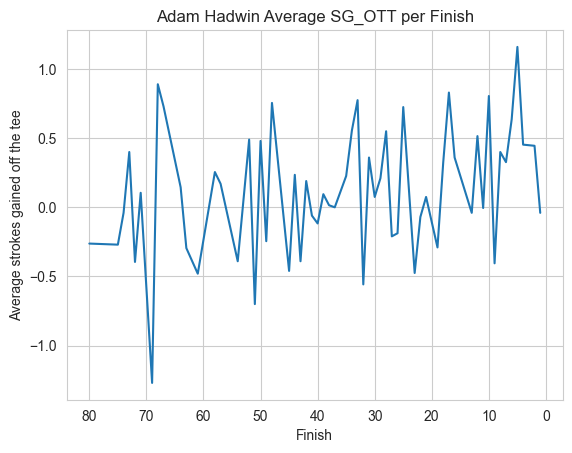

In [46]:
#testing a line plot

# create a copy of the averageStats DataFrame and remove "T" and "cut" values from the index
averageStats_copy = averageStats.copy()
averageStats_copy.index = averageStats_copy.index.astype(str)
averageStats_copy.index = averageStats_copy.index.str.replace("CUT", "80").str.replace("T", "").astype(int)
averageStats_copy = averageStats_copy.groupby(averageStats_copy.index).mean()
plt.plot(averageStats_copy.index, averageStats_copy["sg_ott"])
# add labels and title
plt.xlabel("Finish")
plt.ylabel("Average strokes gained off the tee")
plt.title(PlayerName + " Average SG_OTT per Finish")

plt.gca().invert_xaxis()
plt.show()